#  Phyton Project - Blinkit Analysis

In [1]:
#IMPORT LIBARY 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import Raw Data
df = pd.read_csv("C:\\Users\\shaik\\Downloads\\blinkit_data.csv")

In [3]:
#Sample Data
df.head(2)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.1,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.8,115.3492,5.0


In [4]:
df.tail(2)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [5]:
#Size of Data
print ("Size of Data ", df.shape)

Size of Data  (8523, 12)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#Field info
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [8]:
# data cleaning 
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [9]:
df['Item Fat Content']

0       Regular
1       Low Fat
2       Regular
3       Regular
4       Low Fat
         ...   
8518    low fat
8519    low fat
8520    low fat
8521        reg
8522        reg
Name: Item Fat Content, Length: 8523, dtype: object

In [10]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:

df['Item Fat Content'] = df['Item Fat Content'].replace ({'LF': 'Low Fat',
                                                          'low fat': 'Low Fat',
                                                          'reg' : 'Regular'                                                                                                                 
                                                         })

In [12]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [13]:
# Business Requriments 
#KPI Requriment 

In [14]:
#Total Sales 

total_sales = df['Sales'].sum()

#Average Sales
avg_sales = df['Sales'].mean()

#No of Iteam Sold
no_of_items_sold = df['Sales'].count()

#Average Ratings
avg_ratings = df['Rating'].mean()

#Display

print (f"Total Sales : ${total_sales:,.0f}")
print (f"Average Sales : ${avg_sales:,.0f}")
print (f"No of Iteam Sold : {no_of_items_sold:,.0f}")
print (f"Average Ratings : {avg_ratings:,.0f}")

Total Sales : $1,201,681
Average Sales : $141
No of Iteam Sold : 8,523
Average Ratings : 4


In [15]:
# Chart’s Requirements 

#Total Sales by Fat Content:


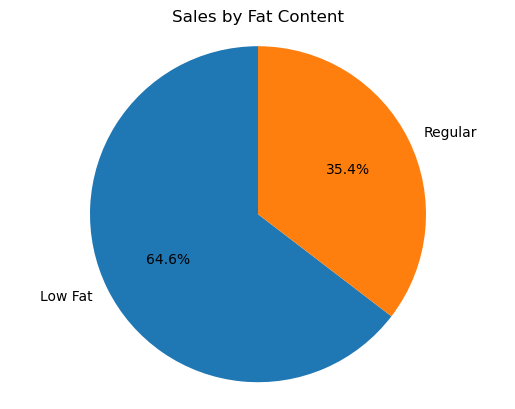

In [16]:
sales_by_fat = df. groupby ('Item Fat Content') ['Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat .index,
        autopct = '%.1f%%',
        startangle = 90)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

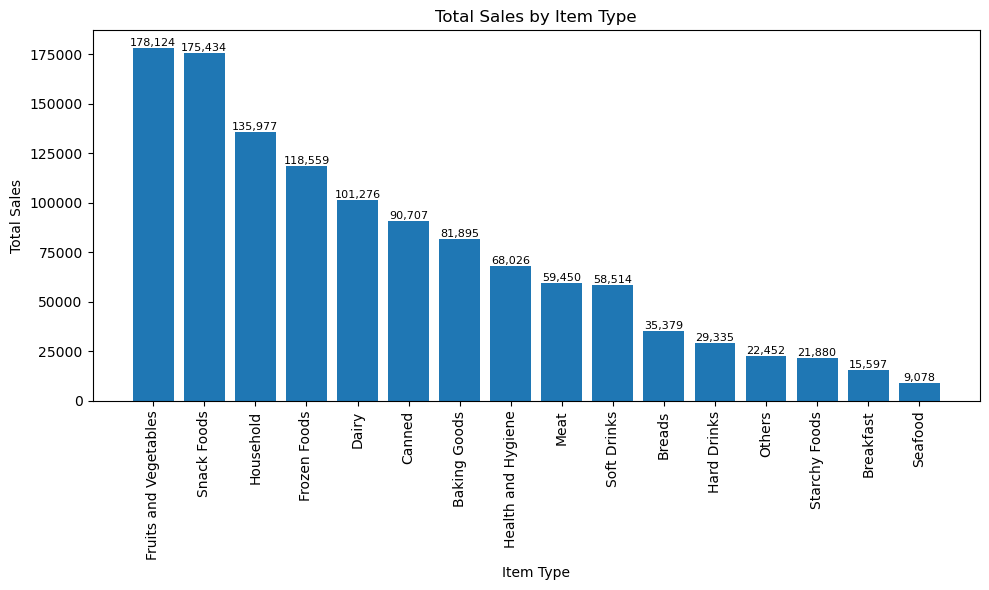

In [17]:
# Total Sales by Item Type:

import matplotlib.pyplot as plt

sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize = (10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)


plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}' , ha= 'center', va= 'bottom', fontsize=8)
    
plt.tight_layout()
plt.show()

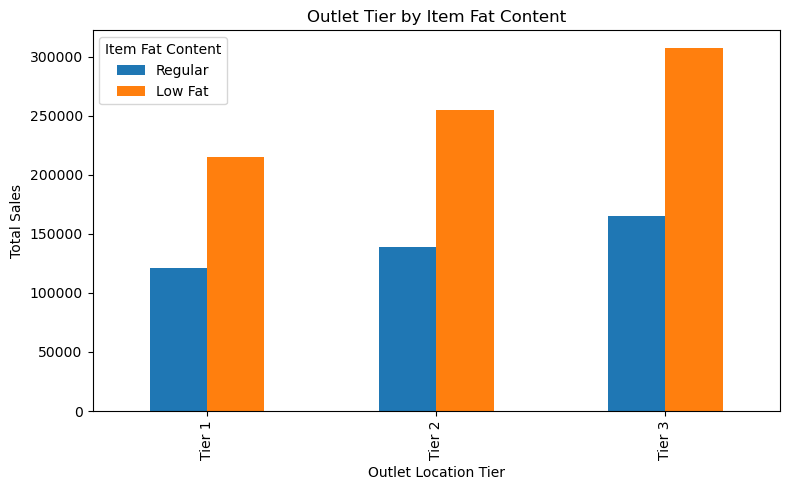

In [19]:
# Fat Content by Outlet for Total Sales:

grouped =df.groupby(['Outlet Location Type' , 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

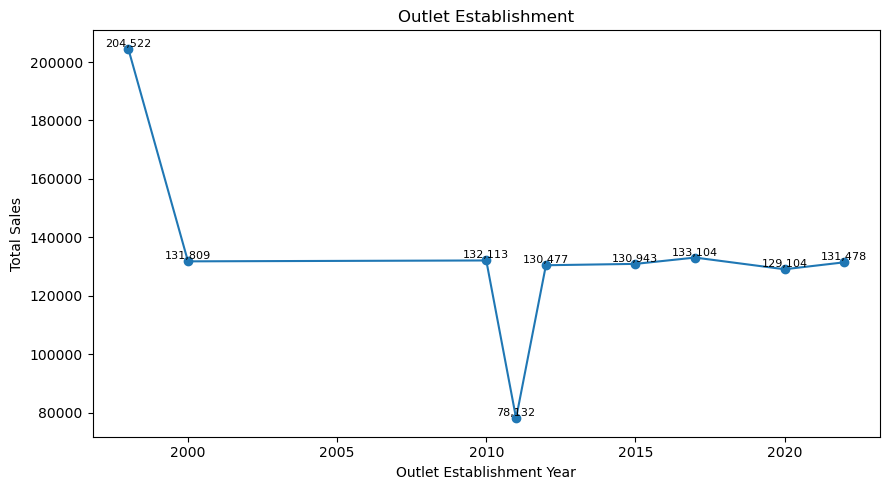

In [27]:
# Total Sales by Outlet Establishment

sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()


plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha= 'center', va='bottom', fontsize=8)
    


plt.tight_layout()
plt.show()


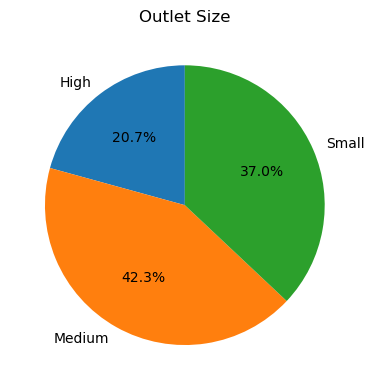

In [28]:
# Sales by Outlet Size

sales_by_size =df.groupby('Outlet Size')['Sales'].sum()


plt.figure(figsize=(4,4 ))
plt.pie(sales_by_size, labels=sales_by_size.index,autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

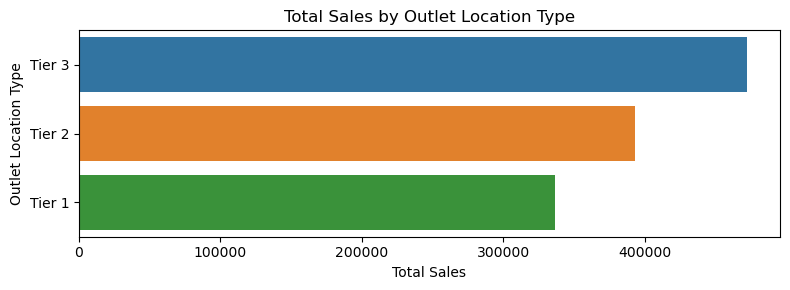

In [30]:
# Sales by Outlet Location

sales_by_location =df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 3)) #smaller height enough width
ax =sns.barplot(x='Sales', y='Outlet Location Type' , data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout() #ensure layout fits without scroll
plt.show()